## Recipe Data With Ingredients

### Format Google Sheet Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

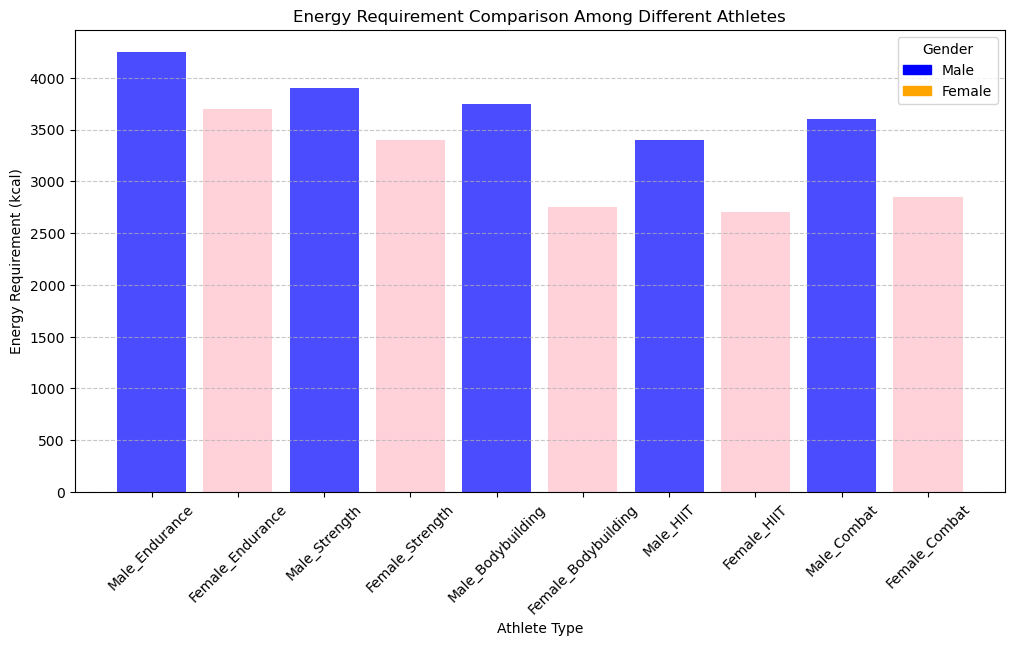

In [14]:
file_path = "Athlete_min_cost_data - rda.csv"
rda_df = pd.read_csv(file_path)

energy_columns = ["Male_Endurance", "Female_Endurance", "Male_Strength", "Female_Strength",
                  "Male_Bodybuilding", "Female_Bodybuilding", "Male_HIIT", "Female_HIIT",
                  "Male_Combat", "Female_Combat"]

rda_df[energy_columns] = rda_df[energy_columns].replace(',', '', regex=True).astype(float)
energy_data = rda_df[rda_df["Nutrient"] == "Energy"][energy_columns].values.flatten()
colors = ['blue' if 'Male' in col else 'pink' for col in energy_columns]
plt.figure(figsize=(12, 6))
plt.bar(energy_columns, energy_data, color=colors, alpha=0.7)
plt.xlabel("Athlete Type")
plt.ylabel("Energy Requirement (kcal)")
plt.title("Energy Requirement Comparison Among Different Athletes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
legend_patches = [Patch(color='blue', label='Male'), Patch(color='orange', label='Female')]
plt.legend(handles=legend_patches, title="Gender")
plt.show()

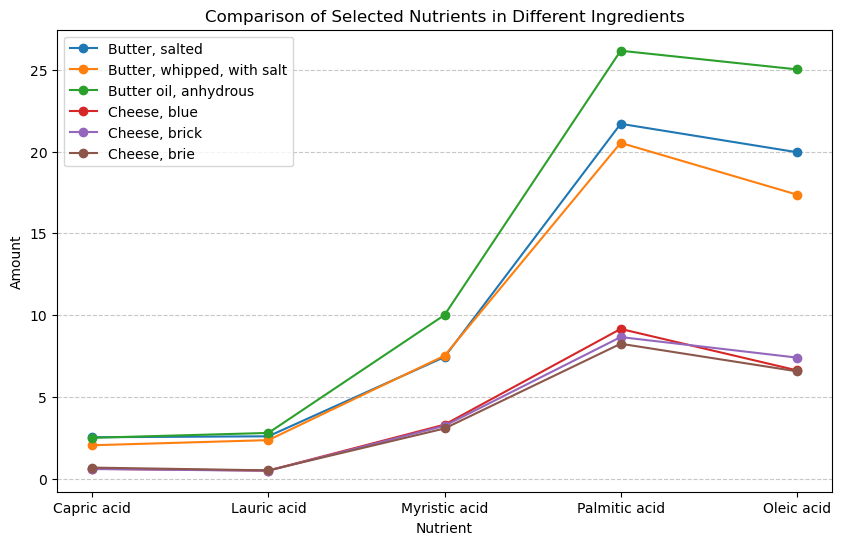

In [15]:
nutrients_csv_path = "Athlete_min_cost_data - nutrients.csv"
nutrients_df = pd.read_csv(nutrients_csv_path)

nutrients_to_compare = ["Capric acid", "Lauric acid", "Myristic acid", "Palmitic acid", "Oleic acid"]

top_ingredients = nutrients_df["Ingredient description"][:6] 
selected_data = nutrients_df.loc[:5, nutrients_to_compare].T 

plt.figure(figsize=(10, 6))
for i, ingredient in enumerate(top_ingredients):
    plt.plot(nutrients_to_compare, selected_data[i], marker='o', linestyle='-', label=ingredient)

plt.xlabel("Nutrient")
plt.ylabel("Amount")
plt.title("Comparison of Selected Nutrients in Different Ingredients")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

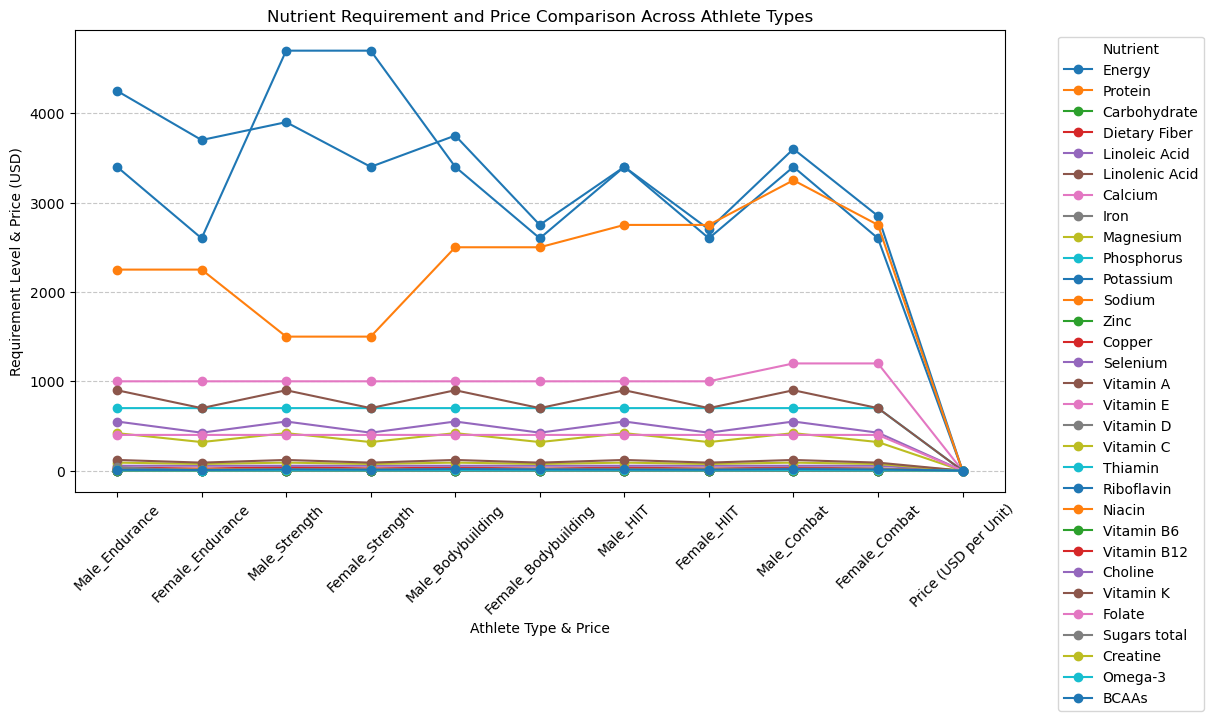

In [16]:
price_csv_path = "Price.csv"  
price_df = pd.read_csv(price_csv_path)

athlete_types = ["Male_Endurance", "Female_Endurance", "Male_Strength", "Female_Strength",
                   "Male_Bodybuilding", "Female_Bodybuilding", "Male_HIIT", "Female_HIIT",
                   "Male_Combat", "Female_Combat", "Price (USD per Unit)"]
comparison_df = price_df.copy()
comparison_df[numeric_columns] = comparison_df[numeric_columns].astype(float)
athlete_types_with_price = athlete_types + ["Price (USD per Unit)"]
plt.figure(figsize=(12, 6))
for i, nutrient in enumerate(comparison_df["Nutrient"]):
    plt.plot(athlete_types_with_price, comparison_df.iloc[i][athlete_types_with_price].values, 
             marker='o', linestyle='-', label=nutrient)
plt.xlabel("Athlete Type & Price")
plt.ylabel("Requirement Level & Price (USD)")
plt.title("Nutrient Requirement and Price Comparison Across Athlete Types")
plt.xticks(rotation=45)
plt.legend(title="Nutrient", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
import pandas as pd

file_path = " Sheet5.csv" 
df = pd.read_csv(file_path)

print(df.columns)  


Index(['Nutrient', 'Nutrient Type', 'Unit', 'Constraint Type',
       'Male_Endurance', 'Female_Endurance', 'Male_Strength',
       'Female_Strength', 'Male_Bodybuilding', 'Female_Bodybuilding',
       'Male_HIIT', 'Female_HIIT', 'Male_Combat', 'Female_Combat',
       'Optimal Food Source', 'Price (USD per Unit)'],
      dtype='object')


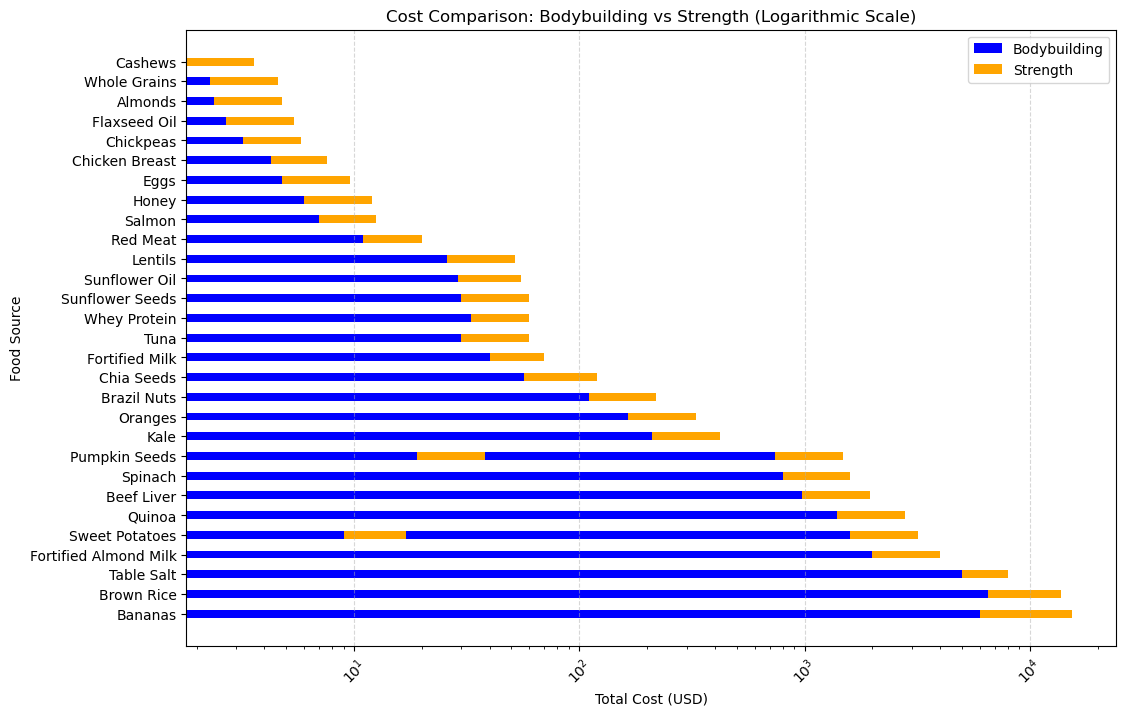

In [18]:
file_path = " Sheet5.csv"
df = pd.read_csv(file_path)
df["Total_Cost_Bodybuilding"] = df["Male_Bodybuilding"] + df["Female_Bodybuilding"]
df["Total_Cost_Strength"] = df["Male_Strength"] + df["Female_Strength"]

df["Total_Cost_Bodybuilding"] = df["Total_Cost_Bodybuilding"].fillna(0)
df["Total_Cost_Strength"] = df["Total_Cost_Strength"].fillna(0)
df["Total_Cost_Sum"] = df["Total_Cost_Bodybuilding"] + df["Total_Cost_Strength"]
df = df.sort_values(by="Total_Cost_Sum", ascending=False)
plt.figure(figsize=(12, 8))
bar_width = 0.4
x_labels = df["Optimal Food Source"]

plt.barh(x_labels, df["Total_Cost_Bodybuilding"], height=bar_width, color="blue", label="Bodybuilding")
plt.barh(x_labels, df["Total_Cost_Strength"], height=bar_width, color="orange", 
         left=df["Total_Cost_Bodybuilding"], label="Strength")
x_max = df["Total_Cost_Sum"].max()
tick_values = [0.00001]
while tick_values[-1] < x_max:
    tick_values.append(tick_values[-1] * 5)

plt.xticks(tick_values, rotation=45)  
plt.xlabel("Total Cost (USD)")
plt.ylabel("Food Source")
plt.title("Cost Comparison: Bodybuilding vs Strength (Logarithmic Scale)")
plt.xscale("log")
plt.grid(axis='x', linestyle="--", alpha=0.5)
plt.legend()
plt.show()

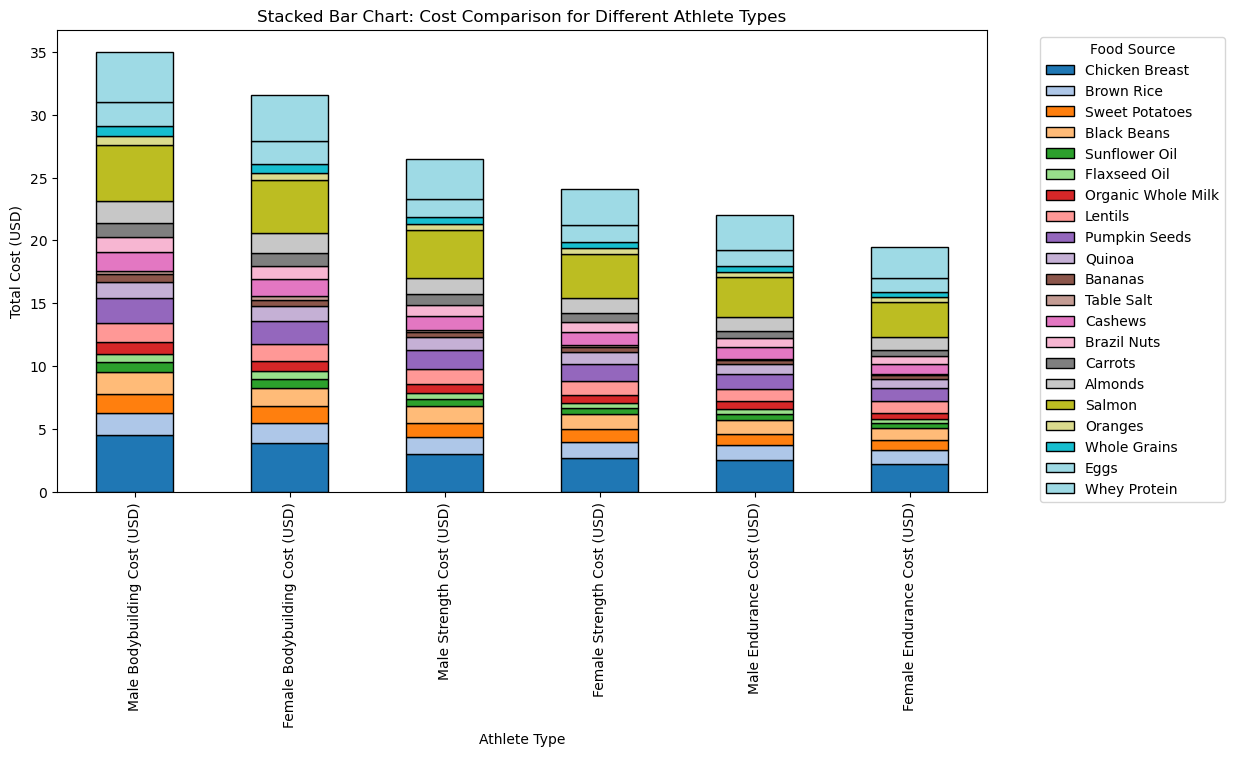

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

food_costs = pd.DataFrame({
    "Trader Joe's Food Source": [
        "Chicken Breast", "Brown Rice", "Sweet Potatoes", "Black Beans", "Sunflower Oil",
        "Flaxseed Oil", "Organic Whole Milk", "Lentils", "Pumpkin Seeds", "Quinoa",
        "Bananas", "Table Salt", "Cashews", "Brazil Nuts", "Carrots",
        "Almonds", "Salmon", "Oranges", "Whole Grains", "Eggs", "Whey Protein"
    ],
    "Male Endurance Cost (USD)": [2.5, 1.2, 0.9, 1.1, 0.5, 0.4, 0.6, 1.0, 1.2, 0.8, 0.3, 0.1, 0.9, 0.7, 0.6, 1.1, 3.2, 0.4, 0.5, 1.2, 2.8],
    "Female Endurance Cost (USD)": [2.2, 1.1, 0.8, 1.0, 0.4, 0.3, 0.5, 0.9, 1.1, 0.7, 0.3, 0.1, 0.8, 0.6, 0.5, 1.0, 2.8, 0.4, 0.4, 1.1, 2.5],
    "Male Strength Cost (USD)": [3.0, 1.4, 1.1, 1.3, 0.6, 0.5, 0.7, 1.2, 1.5, 1.0, 0.4, 0.2, 1.1, 0.9, 0.8, 1.3, 3.8, 0.5, 0.6, 1.4, 3.2],
    "Female Strength Cost (USD)": [2.7, 1.3, 1.0, 1.2, 0.5, 0.4, 0.6, 1.1, 1.4, 0.9, 0.4, 0.2, 1.0, 0.8, 0.7, 1.2, 3.5, 0.5, 0.5, 1.3, 2.9],
    "Male Bodybuilding Cost (USD)": [4.5, 1.8, 1.5, 1.7, 0.8, 0.7, 0.9, 1.5, 2.0, 1.3, 0.6, 0.3, 1.5, 1.2, 1.1, 1.7, 4.5, 0.7, 0.8, 1.9, 4.0],
    "Female Bodybuilding Cost (USD)": [3.9, 1.6, 1.3, 1.5, 0.7, 0.6, 0.8, 1.4, 1.8, 1.2, 0.5, 0.3, 1.3, 1.1, 1.0, 1.6, 4.2, 0.6, 0.7, 1.8, 3.7]
})
food_costs.set_index("Trader Joe's Food Source", inplace=True)
total_cost_per_athlete = food_costs.sum(axis=0)
sorted_athlete_costs = total_cost_per_athlete.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
food_costs[sorted_athlete_costs.index].T.plot(kind="bar", stacked=True, ax=ax, cmap="tab20", edgecolor="black")
plt.xlabel("Athlete Type")
plt.ylabel("Total Cost (USD)")
plt.title("Stacked Bar Chart: Cost Comparison for Different Athlete Types")
plt.legend(title="Food Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()